## 2 Axes Twining

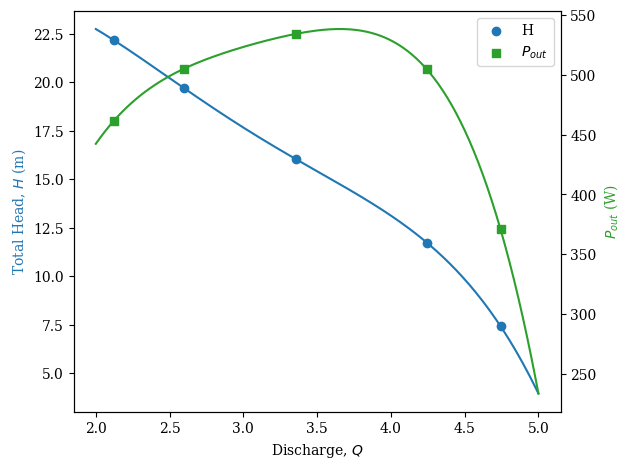

In [62]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['DejaVu Serif']

# Data
Q = np.array([4.743, 4.243, 3.354, 2.598, 2.121])
H = np.array([7.418, 11.727, 16.035, 19.684, 22.162])
Pout = np.array([370.88, 504.54, 534.03, 505.01, 461.3])
Efficiency = np.array([30.08, 39.48, 40.7, 40.34, 40.42])

# Curve fits (2nd degree polynomial)
coeffs_H = np.polyfit(Q, H, 4)
coeffs_Pout = np.polyfit(Q, Pout, 4)
coeffs_Eff = np.polyfit(Q, Efficiency, 4)

poly_H = np.poly1d(coeffs_H)
poly_Pout = np.poly1d(coeffs_Pout)
poly_Eff = np.poly1d(coeffs_Eff)

# Fine Q for smooth curves
Q_fit = np.linspace(np.floor(Q.min()), np.ceil(Q.max()), 200)

# Create figure and axes
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

# Plot data points
ax1.scatter(Q, H, color='tab:blue', marker='o', label='H')
ax2.scatter(Q, Pout, color='tab:green', marker='s', label='$P_{out}$')

# Plot fitted curves
ax1.plot(Q_fit, poly_H(Q_fit), color='tab:blue', linestyle='-')
ax2.plot(Q_fit, poly_Pout(Q_fit), color='tab:green', linestyle='-')

# Labels
ax1.set_xlabel('Discharge, $Q$')
ax1.set_ylabel('Total Head, $H$ (m)', color='tab:blue')
ax2.set_ylabel('$P_{out}$ (W)', color='tab:green')

# Legends
lines = []
labels = []
for ax in [ax1, ax2]:
    l, lbl = ax.get_legend_handles_labels()
    lines += l
    labels += lbl
ax1.legend(lines, labels, loc='best')

# # Add Gridlines
# plt.grid(which='both', axis='both', linestyle='-', linewidth=0.5)

# plt.title('H, Pout, and Efficiency vs Q with Curve Fits')
plt.tight_layout()
plt.savefig('my_figure2.png', dpi=600)
plt.show()


## 3 Axes Twining

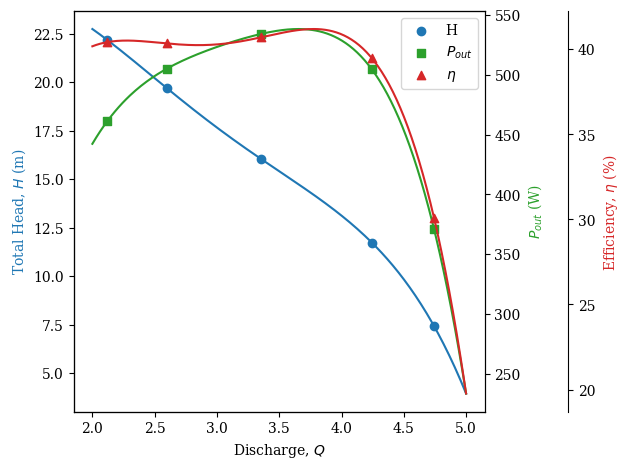

In [63]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['DejaVu Serif']

# Data
Q = np.array([4.743, 4.243, 3.354, 2.598, 2.121])
H = np.array([7.418, 11.727, 16.035, 19.684, 22.162])
Pout = np.array([370.88, 504.54, 534.03, 505.01, 461.3])
Efficiency = np.array([30.08, 39.48, 40.7, 40.34, 40.42])

# Curve fits (2nd degree polynomial)
coeffs_H = np.polyfit(Q, H, 4)
coeffs_Pout = np.polyfit(Q, Pout, 4)
coeffs_Eff = np.polyfit(Q, Efficiency, 4)

poly_H = np.poly1d(coeffs_H)
poly_Pout = np.poly1d(coeffs_Pout)
poly_Eff = np.poly1d(coeffs_Eff)

# Fine Q for smooth curves
Q_fit = np.linspace(np.floor(Q.min()), np.ceil(Q.max()), 200)

# Create figure and axes
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax3 = ax1.twinx()
ax3.spines["right"].set_position(("outward", 60))

# Plot data points
ax1.scatter(Q, H, color='tab:blue', marker='o', label='H')
ax2.scatter(Q, Pout, color='tab:green', marker='s', label='$P_{out}$')
ax3.scatter(Q, Efficiency, color='tab:red', marker='^', label='$\\eta$')

# Plot fitted curves
ax1.plot(Q_fit, poly_H(Q_fit), color='tab:blue', linestyle='-')
ax2.plot(Q_fit, poly_Pout(Q_fit), color='tab:green', linestyle='-')
ax3.plot(Q_fit, poly_Eff(Q_fit), color='tab:red', linestyle='-')

# Labels
ax1.set_xlabel('Discharge, $Q$')
ax1.set_ylabel('Total Head, $H$ (m)', color='tab:blue')
ax2.set_ylabel('$P_{out}$ (W)', color='tab:green')
ax3.set_ylabel('Efficiency, $\\eta$ (%) ', color='tab:red')

# Legends
lines = []
labels = []
for ax in [ax1, ax2, ax3]:
    l, lbl = ax.get_legend_handles_labels()
    lines += l
    labels += lbl
ax1.legend(lines, labels, loc='best')

# # Add Gridlines
# plt.grid(which='both', axis='both', linestyle='-', linewidth=0.5)

# plt.title('H, Pout, and Efficiency vs Q with Curve Fits')
plt.tight_layout()
plt.savefig('my_figure3.png', dpi=600)
plt.show()


<Figure size 640x480 with 0 Axes>